# HOUSE SALE PRICE PREDICTION 
In this project, we used LinearRegression to predict house market prices in Ames-IOWA. Two different model have been trained, before and after feature engineering, to see the improvement better.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

There are quiet a bit of columns that include non-numeric data. Let us first create a quick linear regression model with only the numeric columns.

In [5]:
df_0 = df.select_dtypes(include=["integer", "float"])

In [6]:
df_0.isnull().sum()

Order                0
PID                  0
MS SubClass          0
Lot Frontage       490
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        23
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      159
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [7]:
df_0 = df_0.drop(["Lot Frontage", "Garage Yr Blt"], axis=1)

In [8]:
df_0 = df_0.dropna()

In [9]:
df_0.isnull().sum()

Order              0
PID                0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
SalePrice          0
dtype: int64

In [10]:
X = df_0.drop(["SalePrice"], axis=1)

In [11]:
y=df_0["SalePrice"]

In [12]:
rmse_lst=[]

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    predictions = lr.predict(X_test)
    rmse_lst.append(np.sqrt (mean_squared_error(y_test, predictions)))

rmse = np.mean(rmse_lst)    
print(rmse)

34859.32380574961


In [13]:
print("Mean of the SalePrice: "+str(round(y.mean(),2)))
print("Root mean square error of the created initial model: " + str(round(rmse,2)))
print("Percentage " + str(round(rmse/y.mean()*100,2))+"%")

Mean of the SalePrice: 180389.4
Root mean square error of the created initial model: 34859.32
Percentage 19.32%


This, we can see some sort of a roof that we should improve doing feature engineering. We observed from the glossary that there exists no column which give the information about age of the premises and the time passed since the house is remodeled, which is an importtant criteria. However, there are other information, with which we can create our own.

In [14]:
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [15]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [16]:
# Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

# Drop rows with negative values for both of these new features
df = df.drop([1702, 2180, 2181], axis=0)

# No longer need original year columns
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

In [17]:
# RULES FOR THE DATA CLEANINING
# 1. Remove all features that has more than 5% missing values
# 2. Numerical Columns:
#    2.1 Remove all columns that has absolute correlation less than 0.4
#    2.2 Remove all columns that has normalized std less than 10% of normalized std of target column
#    2.3 Remove all columns that has more than 0.85 absolute correlation in between.
#    
# 3. Non-numerical Columns:
#    3.1 Remove unnecessary source-of-leak columns
#    3.2 Remove all columns that has more than 10 unique values, categorize the rest.


In [18]:
null_check = df.isnull().sum()/len(df.SalePrice)*100
null_check = null_check.sort_values(ascending = False)
print(null_check)

Pool QC              99.555859
Misc Feature         96.412709
Alley                93.235395
Fence                80.457807
Fireplace Qu         48.582166
Lot Frontage         16.740690
Garage Qual           5.432183
Garage Finish         5.432183
Garage Yr Blt         5.432183
Garage Cond           5.432183
Garage Type           5.363854
Bsmt Exposure         2.835668
BsmtFin Type 2        2.767339
Bsmt Qual             2.733174
BsmtFin Type 1        2.733174
Bsmt Cond             2.733174
Mas Vnr Type          0.785787
Mas Vnr Area          0.785787
Bsmt Full Bath        0.068329
Bsmt Half Bath        0.068329
Garage Area           0.034165
Garage Cars           0.034165
Electrical            0.034165
Total Bsmt SF         0.034165
Bsmt Unf SF           0.034165
BsmtFin SF 2          0.034165
BsmtFin SF 1          0.034165
Roof Matl             0.000000
Exter Cond            0.000000
Foundation            0.000000
                       ...    
Central Air           0.000000
Heating 

In [19]:
# Step 1 completed
df_1 = df.drop(null_check[null_check>5].index, axis = 1)

In [20]:
corr_1 = np.absolute(df_1.corr()["SalePrice"]).sort_values()
print(corr_1)

BsmtFin SF 2         0.006001
Misc Val             0.019273
Yr Sold              0.030358
Order                0.031542
3Ssn Porch           0.032268
Mo Sold              0.035273
Bsmt Half Bath       0.035894
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182299
PID                  0.246389
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276486
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439051
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.513121
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641690
Total Bsmt SF        0.643782
Garage Car

In [21]:
# Step 2.1 completed
df_2_1 = df_1.drop(corr_1[corr_1<0.4].index, axis=1)

In [22]:
df_2_1.std()

Overall Qual             1.407608
Mas Vnr Area           177.557713
BsmtFin SF 1           449.695534
Total Bsmt SF          432.622010
1st Flr SF             383.457136
Gr Liv Area            497.778692
Full Bath                0.552472
TotRms AbvGrd            1.563491
Fireplaces               0.647650
Garage Cars              0.760260
Garage Area            214.600881
SalePrice            79914.124173
Years Before Sale       30.283980
Years Since Remod       20.854332
dtype: float64

In [23]:
numeric_cols_2_1 = df_2_1.select_dtypes(include=["integer", "float"]).columns
df_2_2= df_2_1

std_2_2 = ((df_2_2[numeric_cols_2_1]-df_2_2[numeric_cols_2_1].min()) / (df_2_2[numeric_cols_2_1].max() - df_2_2[numeric_cols_2_1].min())).std()

In [24]:
std_2_2

Overall Qual         0.156401
Mas Vnr Area         0.110974
BsmtFin SF 1         0.079677
Total Bsmt SF        0.070806
1st Flr SF           0.087989
Gr Liv Area          0.093779
Full Bath            0.138118
TotRms AbvGrd        0.130291
Fireplaces           0.161913
Garage Cars          0.152052
Garage Area          0.144221
SalePrice            0.107670
Years Before Sale    0.222676
Years Since Remod    0.347572
dtype: float64

It is observed from the list above that there is no numerical columns that has a normalized std less than 1/10th of normalized std of SalePrice. Therefore step 2.2 is completed.

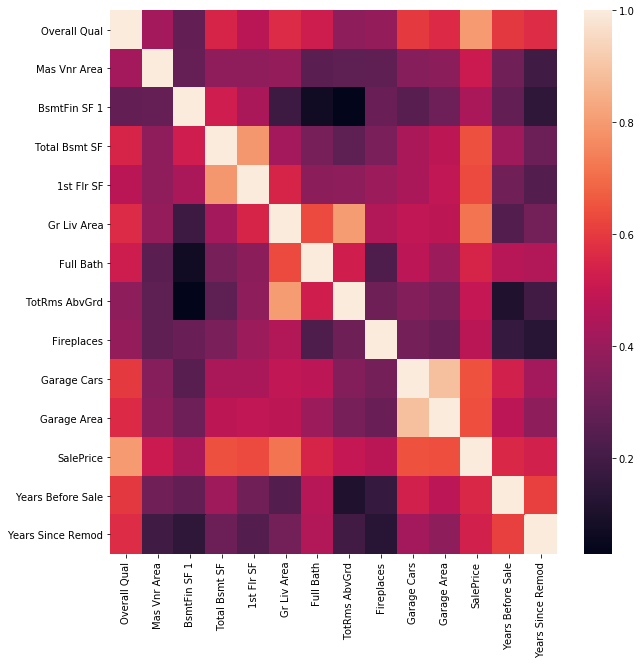

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df_2_2.corr().abs())

In general, it looks safe, however, here are some columns that are over-correlated, like Garage Cars and Garage Area, which make sense actually. We should drop one of those. Just to make sure, let us do the same with numbers.

In [26]:
df_2_2.corr().abs()[df_2_2.corr().abs()>0.85]

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,Years Before Sale,Years Since Remod
Overall Qual,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mas Vnr Area,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFin SF 1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Bsmt SF,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st Flr SF,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gr Liv Area,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Full Bath,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotRms AbvGrd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Fireplaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Garage Cars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.889848,NaN,NaN,NaN


In [27]:
df_2_2[["Garage Area", "Garage Cars"]].head()

,Garage Area,Garage Cars
0,528.0,2.0
1,730.0,1.0
2,312.0,1.0
3,522.0,2.0
4,482.0,2.0


___Garage Area___ looks more repsenetative, therefore we are going to drop ___Garage Cars___

In [28]:
df_2_3 = df_2_2.drop(["Garage Cars"], axis=1)

In [29]:
df_2_3_0 = df_2_3.select_dtypes(include=["integer", "float"])

print(df_2_3_0.isnull().sum())
print("\n")
df_2_3_0 = df_2_3_0.dropna()
print(df_2_3_0.isnull().sum())

Overall Qual          0
Mas Vnr Area         23
BsmtFin SF 1          1
Total Bsmt SF         1
1st Flr SF            0
Gr Liv Area           0
Full Bath             0
TotRms AbvGrd         0
Fireplaces            0
Garage Area           1
SalePrice             0
Years Before Sale     0
Years Since Remod     0
dtype: int64


Overall Qual         0
Mas Vnr Area         0
BsmtFin SF 1         0
Total Bsmt SF        0
1st Flr SF           0
Gr Liv Area          0
Full Bath            0
TotRms AbvGrd        0
Fireplaces           0
Garage Area          0
SalePrice            0
Years Before Sale    0
Years Since Remod    0
dtype: int64


In [30]:
X = df_2_3_0.drop(["SalePrice"], axis=1)
y = df_2_3_0["SalePrice"]

rmse_lst=[]

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    predictions = lr.predict(X_test)
    rmse_lst.append(np.sqrt (mean_squared_error(y_test, predictions)))

rmse = np.mean(rmse_lst)    
print(rmse)

33742.31646598038


This can be considered as an improvement but we need to work on non-numerical columns as well to finalize the model.

In [31]:
# Drop columns that leak info about the final sale
df_3_1 = df_2_3.drop(["Sale Condition", "Sale Type"], axis=1)

In [32]:
#First let us try to figure out which numerical columns should be categorical rather than numerical 
#since the numbers do not have semantic meanings by checking glossary.

df_3_1.select_dtypes(include=["integer", "float"]).columns

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Area', 'SalePrice', 'Years Before Sale', 'Years Since Remod'],
      dtype='object')

___Overall Qual___ is given in the glossary as 
Overall Qual: Rates the overall material and finish of the house

       10   Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor 
 which can be considered as a categorical column instead of numerical. 

In [33]:
overall_qual_dict = {10:"Very Excellent", 9: "Excellent", 8:"Very Good", 7:"Good", 6:"Above Average", 5:"Average", 4:"Below Average", 3:"Fair", 2:"Poor", 1:"Very Poor"}
def overall_qual_fun(num):
    return overall_qual_dict[num]
df_3_1["Overall Qual"] = df_3_1["Overall Qual"].apply(overall_qual_fun)

In [34]:
# Now is to check the non-numerical columns for the same reason.
# Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [35]:
df_3_1.select_dtypes(exclude=["integer", "float"]).columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Paved Drive'],
      dtype='object')

In [36]:
# Let us first check, out of those nominal features, which of the columns we carried to this point
nominal_carried = []
for col in nominal_features:
    if col in df_3_1.columns:
        nominal_carried.append(col)
# Overall Qual  columns is numerical but should be categorized as explained above.        
nominal_carried.append("Overall Qual")
print(nominal_carried)

['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Overall Qual']


Now we should categorize those columns that have less than or equal to 10 unique value above.

In [37]:
uniqueness_counts = df_3_1[nominal_carried].apply(lambda col: len(col.value_counts())).sort_values()
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
df_3_2 = df_3_1.drop(drop_nonuniq_cols, axis=1)
    
text_cols = df_3_2.select_dtypes(include=['object'])
for col in text_cols:
    df_3_2[col] = df_3_2[col].astype('category')
df_3_2 = pd.concat([df_3_2, pd.get_dummies(df_3_2.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)

In [38]:
df_3_2.dropna(inplace=True, axis=0)

Now it looks is the time for the final model creation.

In [42]:
X = df_3_2.drop(["SalePrice"], axis=1)
y = df_3_2["SalePrice"]

rmse_lst=[]

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    predictions = lr.predict(X_test)
    rmse_lst.append(np.sqrt (mean_squared_error(y_test, predictions)))

rmse = np.mean(rmse_lst)    
print(rmse)

28198.905478211866


In [43]:
print("Mean of the SalePrice: "+str(round(y.mean(),2)))
print("Root mean square error of the created initial model: " + str(round(rmse,2)))
print("Percentage " + str(round(rmse/y.mean()*100,2))+"%")

Mean of the SalePrice: 180395.18
Root mean square error of the created initial model: 28198.91
Percentage 15.63%


Error rate has been improved from __19.32%__ to __15.63%__ via feature engineering. 

## Project is over